In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import confusion_matrix

from NeuralNet import NeuralNet, train_model

Epoch: 0 	Train loss: 0.32710 	Training accuracy: 19.325% 	Validation loss: 0.29576 	Validation accuracy: 43.550%
Epoch: 100 	Train loss: 0.20406 	Training accuracy: 86.112% 	Validation loss: 0.20748 	Validation accuracy: 85.150%
Epoch: 200 	Train loss: 0.19885 	Training accuracy: 89.212% 	Validation loss: 0.20645 	Validation accuracy: 85.500%
Epoch: 300 	Train loss: 0.19527 	Training accuracy: 91.088% 	Validation loss: 0.20560 	Validation accuracy: 86.450%
Epoch: 400 	Train loss: 0.19303 	Training accuracy: 92.337% 	Validation loss: 0.20541 	Validation accuracy: 87.200%
Epoch: 500 	Train loss: 0.19133 	Training accuracy: 93.125% 	Validation loss: 0.20544 	Validation accuracy: 87.250%
Epoch: 600 	Train loss: 0.19161 	Training accuracy: 93.300% 	Validation loss: 0.20553 	Validation accuracy: 86.950%
Epoch: 700 	Train loss: 0.19062 	Training accuracy: 93.787% 	Validation loss: 0.20622 	Validation accuracy: 86.350%
Epoch: 800 	Train loss: 0.19028 	Training accuracy: 94.037% 	Validation lo

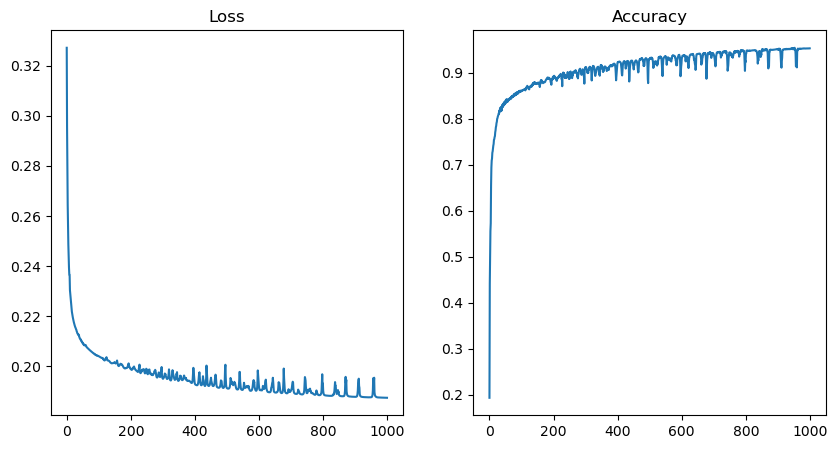

In [4]:
# load fasion mnist dataset
train, test = np.load("../Data/fashion_train.npy"), np.load("../Data/fashion_test.npy")

# split data
X_total, y_total = train[:, :-1], train[:, -1]
X_test, y_test = test[:, :-1], test[:, -1]

# split training data into training and dev set
X_train, X_dev, y_train, y_dev = train_test_split(X_total, y_total, test_size=0.2, random_state=42)

# bool_cutoff = 15
# X_train = X_train > bool_cutoff
# X_dev = X_dev > bool_cutoff

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_dev = scaler.transform(X_dev)
X_test = scaler.transform(X_test)

# PCA
run_pca = True
if run_pca:
    pca = PCA()
    X_train = pca.fit_transform(X_train)
    X_dev = pca.transform(X_dev)
    X_test = pca.transform(X_test)

# train model and output results
clf = train_model(X_train, y_train, epochs=1000, lr=0.0001, min_improve_epochs=100, val_set=(X_dev, y_dev), lr_scheduler=False)

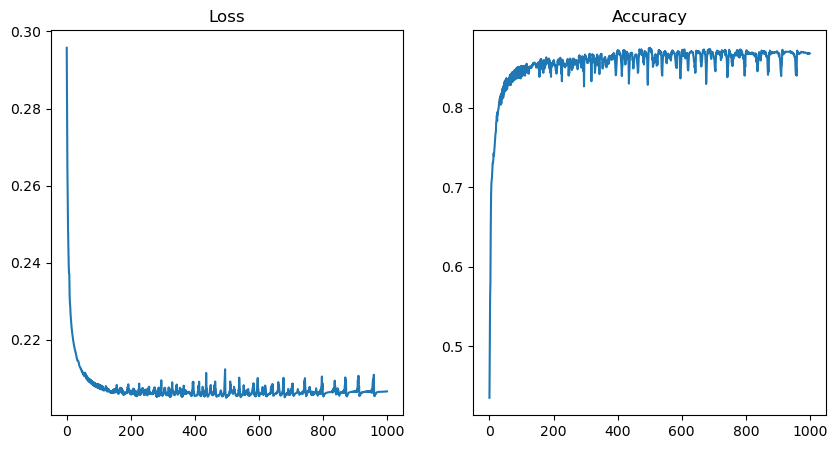

In [5]:
fig = plt.figure(figsize=(10, 5))
for i, metric in enumerate([clf.loss_hist_val, clf.accuracy_hist_val]):
    plt.subplot(1, 2, i+1)
    plt.plot(range(len(metric)), metric)
    plt.title(f"Loss" if i == 0 else f"Accuracy")
plt.show()

In [6]:
# find max loss in val history
max_loss = min(clf.loss_hist_val)
max_loss_idx = clf.loss_hist_val.index(max_loss)
print(f"Best epoch for loss: {max_loss_idx + 1} (loss: {max_loss:.5f})")

Best epoch for loss: 498 (loss: 0.20497)


Epoch: 0 	Loss: 0.32805 	Accuracy: 19.130%
Epoch: 100 	Loss: 0.20378 	Accuracy: 85.990%
Epoch: 200 	Loss: 0.19967 	Accuracy: 87.690%
Epoch: 300 	Loss: 0.19609 	Accuracy: 90.010%
Epoch: 400 	Loss: 0.19568 	Accuracy: 90.350%
Epoch: 500 	Loss: 0.19559 	Accuracy: 90.280%
Epoch: 600 	Loss: 0.19562 	Accuracy: 90.250%
Epoch: 700 	Loss: 0.19055 	Accuracy: 93.480%
Epoch: 800 	Loss: 0.19105 	Accuracy: 93.400%
Epoch: 900 	Loss: 0.18861 	Accuracy: 94.620%
Epoch: 1000 	Loss: 0.18802 	Accuracy: 94.980%
Epoch: 1100 	Loss: 0.18951 	Accuracy: 94.660%
Epoch: 1200 	Loss: 0.18731 	Accuracy: 95.600%
Epoch: 1300 	Loss: 0.18694 	Accuracy: 96.070%
Epoch: 1400 	Loss: 0.18651 	Accuracy: 96.410%
Epoch: 1499 	Loss: 0.18637 	Accuracy: 96.490%

Train
Train loss: 0.18636
Train accuracy: 96.550%
Train AUC ROC: 0.9892786860137317


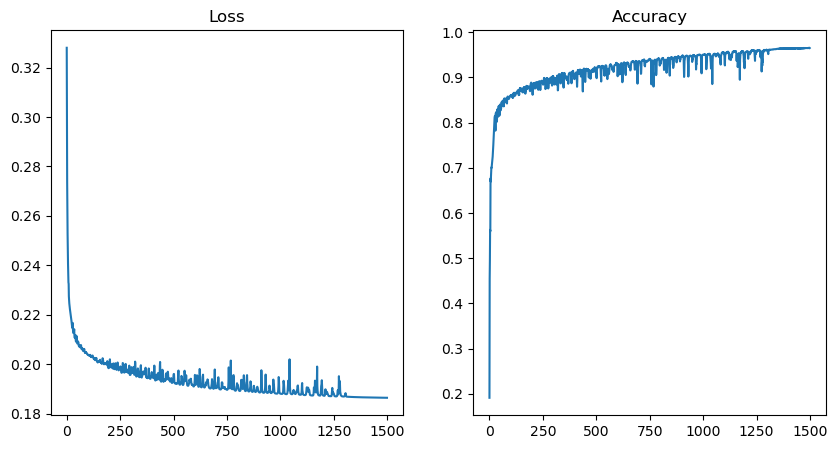

In [20]:
# load fasion mnist dataset
train, test = np.load("../Data/fashion_train.npy"), np.load("../Data/fashion_test.npy")

# split data
X_total, y_total = train[:, :-1], train[:, -1]
X_test, y_test = test[:, :-1], test[:, -1]

# Final testing
scaler = StandardScaler()
X_total = scaler.fit_transform(X_total)
X_test = scaler.transform(X_test)

# PCA
if run_pca:
    pca = PCA()
    X_total = pca.fit_transform(X_total)
    X_test = pca.transform(X_test)

# train model and output results
clf = train_model(X_total, y_total, epochs=1500, lr=0.0001, min_improve_epochs=200)

In [50]:
# Test
preds = clf.predict(X_test)
loss = clf.cross_entropy_loss(clf.one_hot(y_test), clf.forward_propagation(X_test))
acc = clf.get_accuracy_score(y_test, preds)
print(f"Test loss: {loss:.3f}")
print(f"Test accuracy: {acc:.3%}")
AUC_roc = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class="ovr")
print(f"Test AUC ROC: {AUC_roc}")

Test loss: 0.210
Test accuracy: 85.480%
Test AUC ROC: 0.9553052750000001


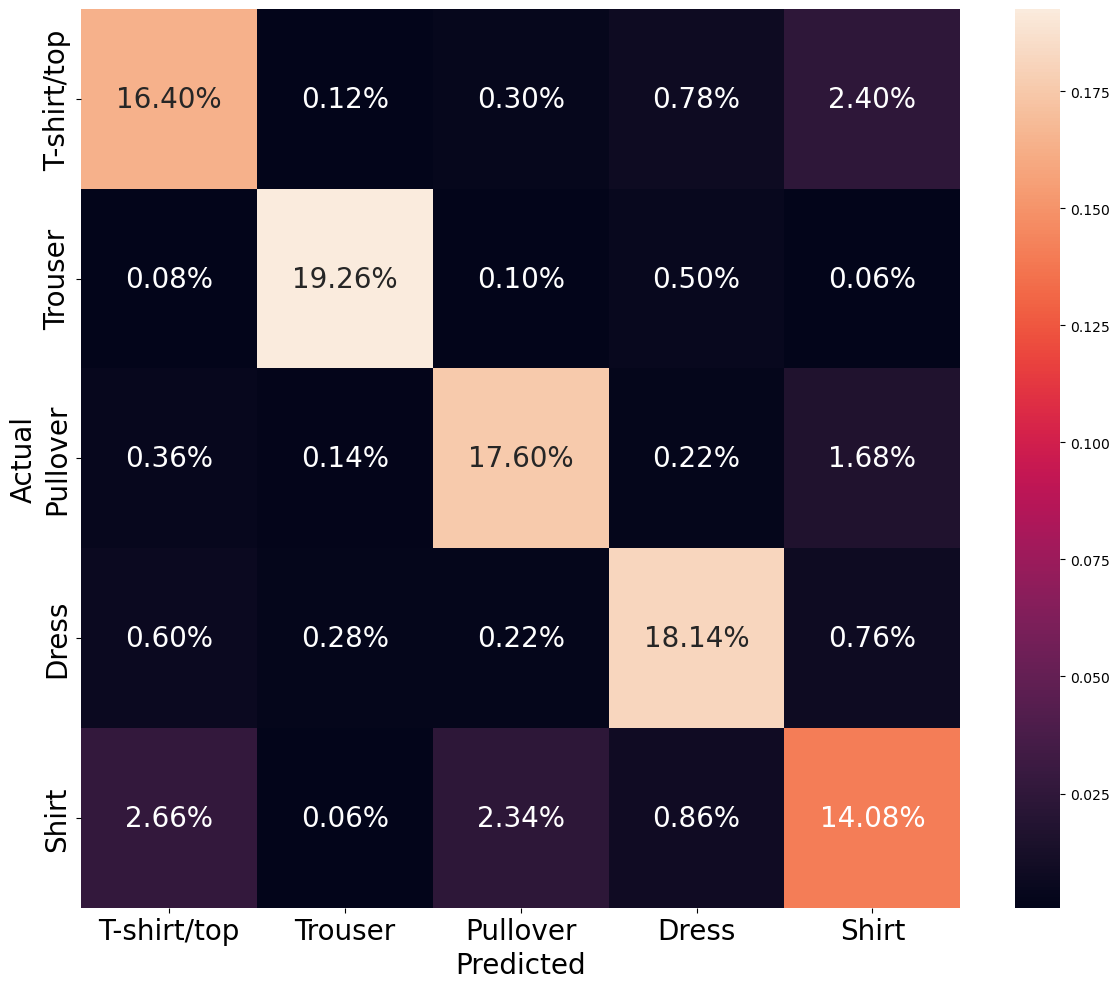

In [67]:
classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Shirt"]
# plot confusion matrix from clf
cm = confusion_matrix(y_test, preds)

cm = cm.astype('float') / cm.sum()
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='.2%', xticklabels=classes, yticklabels=classes, annot_kws={"size":20})
plt.ylabel('Actual', fontsize=20)
plt.xlabel('Predicted', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
plt.savefig("cm_nn.png")